In [ ]:
import nbformat

# Path to this notebook in Colab
notebook_path = '/content/drive/MyDrive/Colab Notebooks/comparativeAnalysis.ipynb'

# Load the current notebook
with open('/content/drive/MyDrive/Colab Notebooks/comparativeAnalysis.ipynb', 'r') as f:
    nb = nbformat.read(f, as_version=nbformat.NO_CONVERT)

# Remove problematic widget metadata
if 'widgets' in nb.metadata:
    del nb.metadata['widgets']

# Save cleaned version
with open(notebook_path, 'w') as f:
    nbformat.write(nb, f)

print(f"Cleaned notebook saved to {notebook_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/comparativeAnalysis.ipynb'

In [ ]:
!git clone https://github.com/RaphaelEse/LawGorithmML.git

Cloning into 'LawGorithmML'...
remote: Enumerating objects: 1176, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (394/394), done.
remote: Total 1176 (delta 276), reused 287 (delta 101), pack-reused 676 (from 1)
Receiving objects: 100% (1176/1176), 61.67 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (615/615), done.
Updating files: 100% (813/813), done.


In [1]:
!pip install datasets
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00


In [3]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_save_path = "/content/drive/My Drive/legal_nlp_artifacts"
os.makedirs(drive_save_path, exist_ok=True)


NameError: name 'os' is not defined

In [4]:
# Install PyTorch Geometric and dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 7.5 MB/s eta 0:00:00


In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, AutoModel, DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
from tqdm import tqdm
from datasets import Dataset
import os
import glob
import pandas as pd
import json
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, Dataset
import numpy as np
import concurrent.futures
from sklearn.utils import resample
import nltk
from nltk.tokenize import sent_tokenize
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from torch_geometric.data import Data
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Module
from torch import optim
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "


In [ ]:
nltk.download("punkt")
nltk.download('punkt_tab')

In [ ]:
# Define the path to the full-text bills
bills_path = "/content/LawGorithmML/citations/citations/sample_bills"

# Get all text files in the directory
bill_files = sorted(glob.glob(os.path.join(bills_path, "*.txt")))

bill_texts = {}
def load_file(file):
    with open(file, "r", encoding="utf-8") as f:
        return os.path.basename(file), f.read()

# Load 108 bills using multi-threading
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(load_file, bill_files)

bill_texts = dict(results)

print(f"Loaded {len(bill_texts)} bills.")

Loaded 108 bills.


In [ ]:
json_path = "/content/LawGorithmML/labeled_citations_zero_shot/"
# Get all JSON files in the directory
# Load cleaned citation JSON files
json_files = sorted(os.listdir(json_path))

# Read and combine JSON files
cleaned_citations = []
for file in json_files:
    with open(os.path.join(json_path, file), "r", encoding="utf-8") as f:
        cleaned_citations.extend(json.load(f))

# Convert to DataFrame
df_citations = pd.DataFrame(cleaned_citations)

df_citations["normCite"] = df_citations["normCite"].astype(str)

# Filter out citations without `normCite`
df_citations = df_citations[df_citations["normCite"].notna()]
df_citations = df_citations[df_citations["normCite"].str.strip() != ""]
# Display dataset size
print(f"Loaded {len(json_files)} cleaned citation files with {len(df_citations)} citations.")
df_citations.head()


Loaded 77 cleaned citation files with 17405 citations.


,text,startPosition,endPosition,normCite,citeType,altCite,pinCiteStr,pageRangeStr,nodeId,section,sectionAndSubSection,isShortCite,chunk_id,high_confidence
13,Sec. 604,6331,6339,33 usc 1384,USC,33 usc 1384,,,0,,,True,0.0,Precedent
31,Sec. 104,9376,9384,42 usc 5304,USC,42 usc 5304,,,0,,,True,0.0,Amendment
32,Sec. 105,9480,9488,42 usc 5305,USC,42 usc 5305,,,0,,,True,0.0,Example
44,Sec. 204,10663,10671,7 usc 7508,USC,7 usc 7508,,,0,,,True,0.0,Amendment
48,Sec. 211,11303,11311,34 usc 60531,USC,34 usc 60531,,,0,,,True,0.0,Amendment


In [ ]:
# Count occurrences of each string label
print(df_citations["high_confidence"].value_counts())

high_confidence
Example       6612
Amendment     3962
Precedent     2556
Authority     1651
Exception     1425
Definition    1199
Name: count, dtype: int64


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/test_dataset.csv")
df = pd.concat([train_df, test_df], ignore_index=True).reset_index(drop=True)
balanced_sample = df.groupby("original_label").sample(n=3000, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/legal_nlp_artifacts/train_dataset.csv'

In [ ]:
bill_sentences = {
    name: sent_tokenize(text)
    for name, text in bill_texts.items()
}

def extract_context(row):
    #Extracts context from a bill given a citation
    citation_text = row["text"]

    for bill_name, sentences in bill_sentences.items():
        for i, sentence in enumerate(sentences):
            if citation_text in sentence:
                start = max(0, i - 2)
                end = i + 1  # Only before and including citation sentence
                selected = " ".join(sentences[start:end]).strip()
                selected = re.sub(r"\s+", " ", selected)  # Clean up spaces
                return selected if len(selected) > 20 else None
    return None

# Convert to list for parallel processing
rows = df_citations.to_dict(orient="records")


with ThreadPoolExecutor() as executor:
    contexts = list(executor.map(extract_context, rows))

# Assign back to DataFrame
df_citations["context"] = contexts

# Drop rows with no context
df_citations = df_citations.dropna(subset=["context"])

# View result
df_citations[["text", "context"]].head()


,text,context
113,section 101(9),REFERENCES Except as expressly provided otherw...
120,section 101,REFERENCES Except as expressly provided otherw...
121,section 101,REFERENCES Except as expressly provided otherw...
123,section 101,REFERENCES Except as expressly provided otherw...
124,section 101,REFERENCES Except as expressly provided otherw...


In [ ]:
# View result
df_citations[["text", "context"]].head(10)

,text,context
113,section 101(9),REFERENCES Except as expressly provided otherw...
120,section 101,REFERENCES Except as expressly provided otherw...
121,section 101,REFERENCES Except as expressly provided otherw...
123,section 101,REFERENCES Except as expressly provided otherw...
124,section 101,REFERENCES Except as expressly provided otherw...
125,section 101,REFERENCES Except as expressly provided otherw...
126,section 251(b)(2)(A)(i) of the Balanced Budget...,Amounts made available by section 101 for Depa...
128,section 101,REFERENCES Except as expressly provided otherw...
130,section 101,REFERENCES Except as expressly provided otherw...
132,section 101,REFERENCES Except as expressly provided otherw...


In [ ]:
# Keep only necessary columns
df = df_citations[["text", "normCite", "citeType", "context", "high_confidence"]]

# Rename columns for clarity
df = df.rename(columns={"high_confidence": "label"})

# Encode labels as numbers (since models need numerical labels)
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

# Save label mapping for later decoding
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Split into train/test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["context"], df["label"], test_size=0.2, random_state=42
)

# Convert into Pandas DataFrame format
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
test_df = pd.DataFrame({"text": test_texts, "label": test_labels})

# Ensure training and test dataframes have contexts and labels
print(f"Training Samples: {len(train_df)}, Test Samples: {len(test_df)}")
train_df.head(10)

Label Mapping: {'Amendment': np.int64(0), 'Authority': np.int64(1), 'Definition': np.int64(2), 'Example': np.int64(3), 'Exception': np.int64(4), 'Precedent': np.int64(5)}
Training Samples: 7588, Test Samples: 1898


,text,label
3405,"9011)), cotton, and sugar; and (ii) shall not ...",3
7841,"9011)), cotton, and sugar; and (ii) shall not ...",2
7608,BANNING OF PRODUCTS CONTAINING A HIGH CONCENTR...,3
533,Domestic Food Programs Food and Nutrition Serv...,1
473,Domestic Food Programs Food and Nutrition Serv...,2
8435,"9011)), cotton, and sugar; and (ii) shall not ...",0
3905,"9011)), cotton, and sugar; and (ii) shall not ...",5
2728,Domestic Food Programs Food and Nutrition Serv...,3
65,Amounts made available by section 101 for Depa...,5
2375,BANNING OF PRODUCTS CONTAINING A HIGH CONCENTR...,5


In [ ]:
# LegalBERT
MODEL_NAME = "nlpaueb/legal-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Convert Pandas DF to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize dataset
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Load pre-trained model for classification
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/7588 [00:00<?, ? examples/s]

Map:   0%|          | 0/1898 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f" Using device: {device}")

 Using device: cuda


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
model.to(device)
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=30,
    weight_decay=0.05,
    fp16=True,
    logging_dir='./logs',
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics
)
# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.518101,0.425184,0.321399,0.361588,0.425184
2,No log,1.511408,0.431507,0.339237,0.396970,0.431507
3,1.485000,1.502697,0.435722,0.346856,0.409021,0.435722
4,1.485000,1.511055,0.431507,0.352914,0.384591,0.431507
5,1.454800,1.515994,0.432561,0.351335,0.395536,0.432561
6,1.454800,1.499831,0.436249,0.358616,0.416307,0.436249
7,1.417000,1.501251,0.437829,0.371744,0.431516,0.437829
8,1.417000,1.511987,0.429926,0.372113,0.428139,0.429926
9,1.369900,1.527329,0.440464,0.376223,0.441155,0.440464
10,1.369900,1.522360,0.437302,0.372375,0.435189,0.437302


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Save model and tokenizer
model.save_pretrained("./fine_tuned_legalbert")
tokenizer.save_pretrained("./fine_tuned_legalbert")
# Zip the model folder
!zip -r fine_tuned_legalbert.zip fine_tuned_legalbert

# Download to local computer
from google.colab import files
files.download("fine_tuned_legalbert.zip")


  adding: fine_tuned_legalbert/ (stored 0%)
  adding: fine_tuned_legalbert/model.safetensors (deflated 7%)
  adding: fine_tuned_legalbert/vocab.txt (deflated 51%)
  adding: fine_tuned_legalbert/special_tokens_map.json (deflated 42%)
  adding: fine_tuned_legalbert/tokenizer_config.json (deflated 75%)
  adding: fine_tuned_legalbert/tokenizer.json (deflated 71%)
  adding: fine_tuned_legalbert/config.json (deflated 55%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Retreive and use model
model = AutoModelForSequenceClassification.from_pretrained("./fine_tuned_legalbert")
tokenizer = AutoTokenizer.from_pretrained("./fine_tuned_legalbert")

# GCN START

In [7]:
train_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/test_dataset.csv")
train_df = train_df.groupby("original_label").sample(n=1000, random_state=42)
test_df = train_df.groupby("original_label").sample(n=1000, random_state=42)

In [8]:
# Generate TF-IDF matrix for context text
tfidf = TfidfVectorizer(max_features=1000)
X_train = tfidf.fit_transform(train_df["context"])
X_test = tfidf.transform(test_df["context"])

features_train = X_train.toarray()
features_test = X_test.toarray()

# Cosine similarity matrix (for train set only)
similarity_matrix = cosine_similarity(X_train)
threshold = 0.5
adj_matrix = (similarity_matrix > threshold).astype(int)

# Create NetworkX graph from adjacency matrix (train only)
G = nx.from_numpy_array(adj_matrix)

# Extract edges from graph
edge_index_train = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

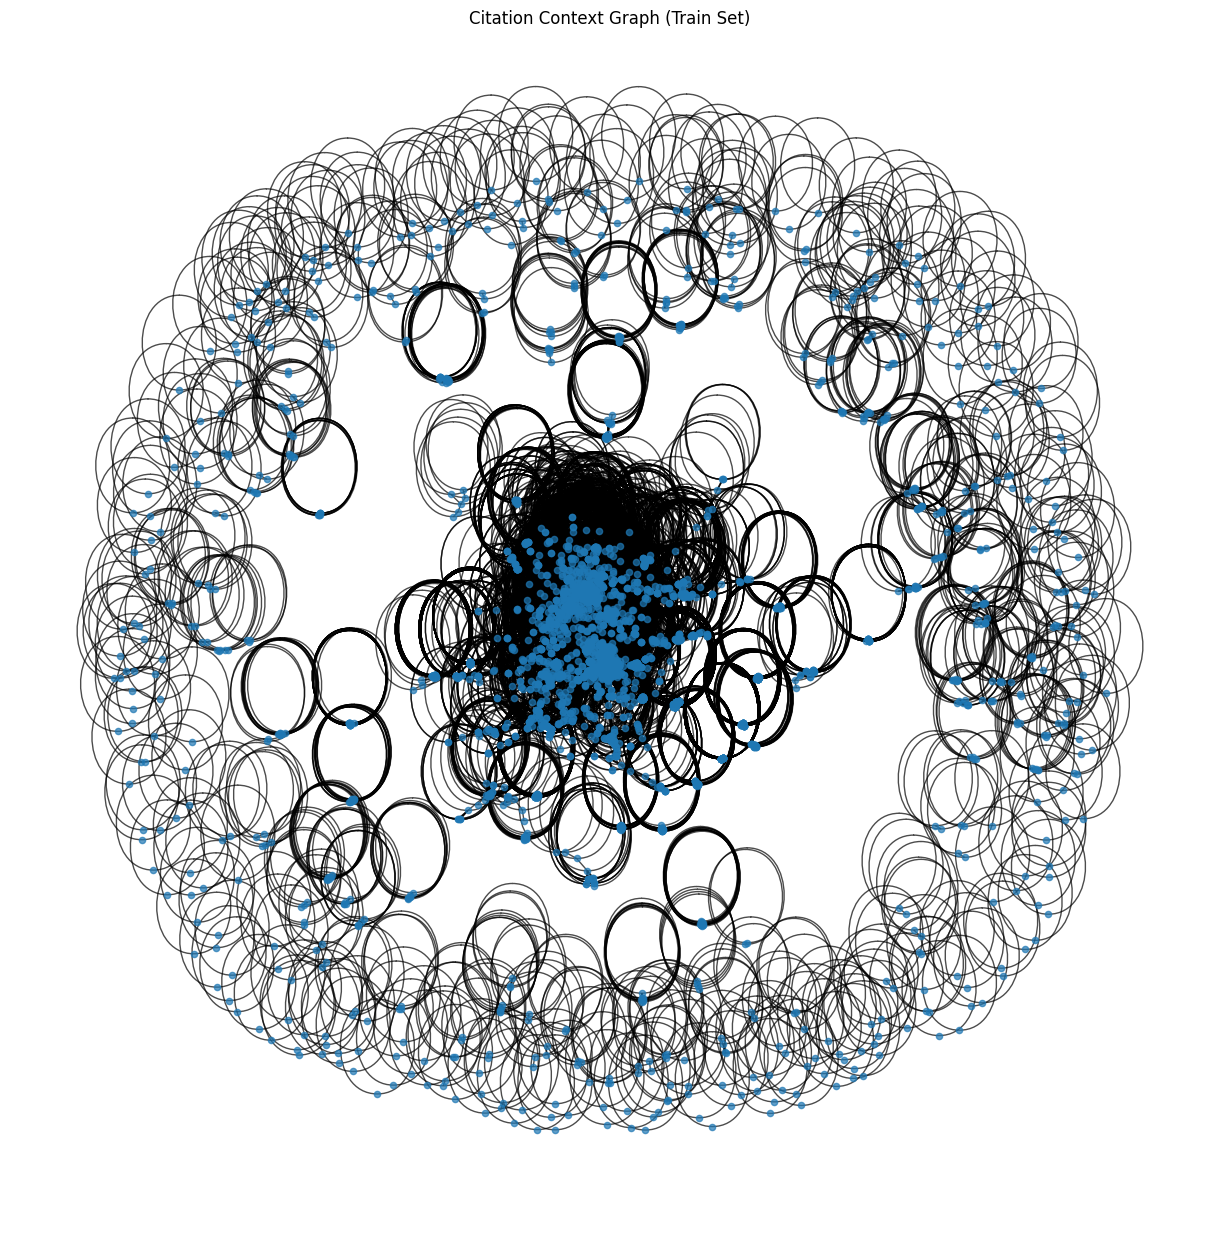

In [12]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # layout algorithm for better spreading
nx.draw(G, pos, node_size=20, edge_color="black", alpha=0.7)
plt.title("Citation Context Graph (Train Set)")
plt.show()

In [ ]:
#Graph Visualization
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
net.from_nx(G)

#Color the nodes by label
labels = train_data.y.cpu().numpy()

for node in net.nodes:
    node_id = node["id"]
    label = labels[node_id]  # Use the node ID to find the label from train_data
    node["title"] = f"Label: {label}"
    node["color"] = ["red", "blue", "green", "purple", "orange"][label % 5]


In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df["original_label"])
y_test = label_encoder.transform(test_df["original_label"])

NameError: name 'X_tfidf' is not defined

In [ ]:
# Create PyG Data objects
x_train = torch.tensor(features_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)

x_test = torch.tensor(features_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.long)

train_data = Data(x=x_train, edge_index=edge_index_train, y=y_train)
test_data = Data(x=x_test, edge_index=torch.empty((2, 0), dtype=torch.long), y=y_test)

In [ ]:
class GCN(Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

gModel = GCN(in_channels=x_train.shape[1], hidden_channels=64, out_channels=len(label_encoder.classes_)).to(device)
train_data = train_data.to(device)
optimizer = optim.Adam(gModel.parameters(), lr=0.01, weight_decay=5e-4)

# Initialize list to track metrics
metrics_per_epoch = []

# Training loop
for epoch in range(1, 171):
    gModel.train()
    optimizer.zero_grad()
    out = gModel(train_data)
    loss = F.nll_loss(out, train_data.y)
    loss.backward()
    optimizer.step()

    # Evaluation every 10 epochs
    if epoch % 10 == 0 or epoch == 1:
        gModel.eval()
        out_test = gModel(test_data.to(device))
        _, pred = out_test.max(dim=1)

        y_true = test_data.y.cpu().numpy()
        y_pred = pred.cpu().numpy()

        acc = accuracy_score(y_true, y_pred)
        f1_weighted = f1_score(y_true, y_pred, average="weighted")
        f1 = f1_score(y_true, y_pred, average="micro")
        precision = precision_score(y_true, y_pred, average="weighted")
        recall = recall_score(y_true, y_pred, average="weighted")

        # Print checkpoint metrics
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | F1: {f1:.4f} | Weighted F1: {f1_weighted:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}" )

        # Save to list
        metrics_per_epoch.append({
            "Epoch": epoch,
            "Accuracy": acc,
            "F1": f1,
            "Weighted F1": f1_weighted,
            "Precision": precision,
            "Recall": recall
        })

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics_per_epoch)
metrics_df.to_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_epoch_metrics.csv", index=False)

Epoch 001 | Loss: 1.5993 | Accuracy: 0.5020 | F1: 0.5020 | Weighted F1: 0.5014 | Precision: 0.5521 | Recall: 0.5020
Epoch 010 | Loss: 0.8753 | Accuracy: 0.6853 | F1: 0.6853 | Weighted F1: 0.6877 | Precision: 0.7019 | Recall: 0.6853
Epoch 020 | Loss: 0.7033 | Accuracy: 0.7405 | F1: 0.7405 | Weighted F1: 0.7435 | Precision: 0.7570 | Recall: 0.7405
Epoch 030 | Loss: 0.6102 | Accuracy: 0.7688 | F1: 0.7688 | Weighted F1: 0.7715 | Precision: 0.7860 | Recall: 0.7688
Epoch 040 | Loss: 0.5494 | Accuracy: 0.7945 | F1: 0.7945 | Weighted F1: 0.7968 | Precision: 0.8106 | Recall: 0.7945
Epoch 050 | Loss: 0.5104 | Accuracy: 0.8050 | F1: 0.8050 | Weighted F1: 0.8062 | Precision: 0.8157 | Recall: 0.8050
Epoch 060 | Loss: 0.4828 | Accuracy: 0.8315 | F1: 0.8315 | Weighted F1: 0.8309 | Precision: 0.8378 | Recall: 0.8315
Epoch 070 | Loss: 0.4661 | Accuracy: 0.8017 | F1: 0.8017 | Weighted F1: 0.8045 | Precision: 0.8246 | Recall: 0.8017
Epoch 080 | Loss: 0.4496 | Accuracy: 0.8323 | F1: 0.8323 | Weighted F1: 

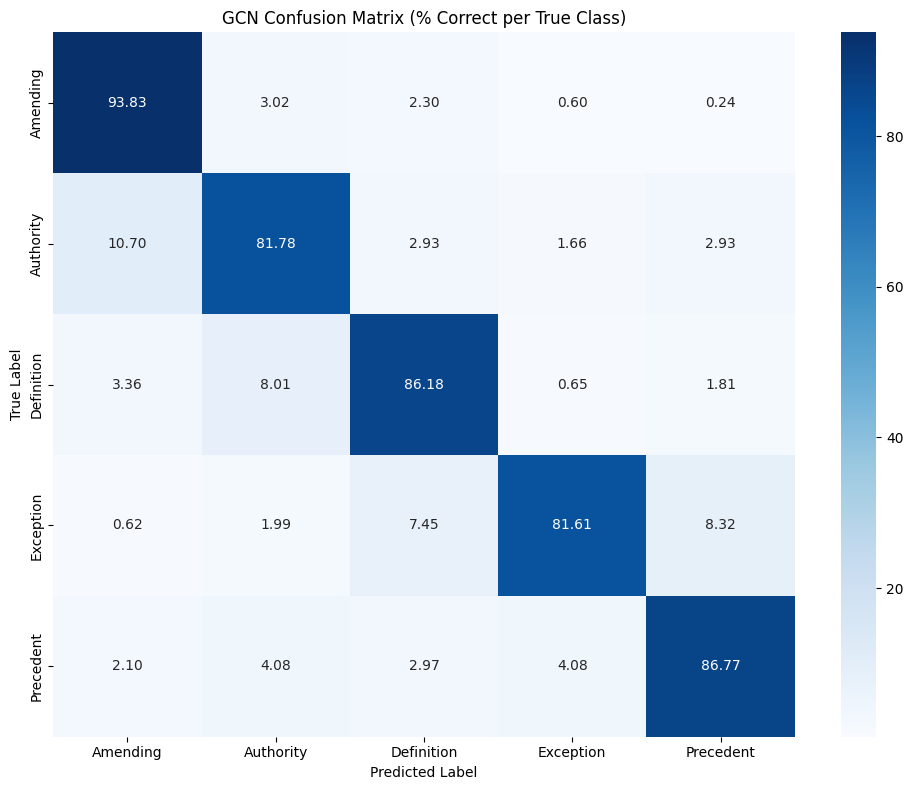

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to row-wise percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percent = np.round(cm_percent, 2)

# Manual label names (ordered by label mapping)
labels_text = ['Amending', 'Authority', 'Definition', 'Exception', 'Precedent']

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels_text,
            yticklabels=labels_text)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GCN Confusion Matrix (% Correct per True Class)")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/legal_nlp_artifacts/gcn_confusion_matrix_percent.png")
plt.show()

In [ ]:
# Get predictions
gModel.eval()
out = gModel(data)
_, pred = out.max(dim=1)

# Masked predictions and true labels
y_true = data.y[data.test_mask].cpu().numpy()
y_pred = pred[data.test_mask].cpu().numpy()

# Compute all metrics
acc = accuracy_score(y_true, y_pred)
f1_weighted = f1_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="micro")
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")

# Print them
print(f"\nFinal Test Accuracy: {acc:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

# Optional: Show full per-class breakdown
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Save to CSV
results = pd.DataFrame([{
    "Accuracy": acc,
    "Weighted F1": f1_weighted,
    "F1": f1,
    "Precision": precision,
    "Recall": recall
}])
results.to_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_metrics.csv", index=False)


Final Test Accuracy: 0.8610
Weighted F1 Score: 0.8607
Precision: 0.8626, Recall: 0.8610

Classification Report:
              precision    recall  f1-score   support

    Amending       0.85      0.94      0.89       827
   Authority       0.83      0.82      0.82       785
  Definition       0.84      0.86      0.85       774
   Exception       0.92      0.82      0.87       805
   Precedent       0.87      0.87      0.87       809

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



In [ ]:
# Create results DataFrame
results_df = pd.DataFrame({
    "predicted_label": label_encoder.inverse_transform(pred.cpu().numpy()),
    "true_label": label_encoder.inverse_transform(data.y.cpu().numpy()),
    "bill": balanced_sample["bill"].values,
    "citation_id": balanced_sample["citation_id"].values,
    "context": balanced_sample["context"].values
})

filtered_results_df = results_df[
    (results_df["bill"].notna()) &
    (results_df["citation_id"].notna()) &
    (results_df["bill"] != "") &
    (results_df["citation_id"] != "")
]
# Save the unfiltered results
results_df.to_csv("/content/drive/MyDrive/legal_nlp_artifacts/unfiltered_gcn_predictions_real.csv", index=False)
# Save the filtered results
filtered_results_df.to_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_predictions_real.csv", index=False)

In [ ]:
# Load the CSV
gcn_results_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_results.csv")

# Check shape
print("Shape of GCN results dataframe:", gcn_results_df.shape)


Shape of GCN results dataframe: (15000, 5)


In [ ]:
# Load the CSV
gcn_results_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/unfiltered_gcn_predictions_real.csv")

# Check shape
print("Shape of GCN results dataframe:", gcn_results_df.shape)


Shape of GCN results dataframe: (20000, 5)


In [6]:
# Load bill names dictionary
billnames_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/BillsNamesDictionary.csv")

# Load model outputs
legalbert_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/legalbert_test_filtered.csv")
distilbert_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/distilbert_test_filtered.csv")
gcn_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_results.csv")

# Load custom NLP model results
custom_nlp_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/custom_nlp_results_filtered.csv")

In [ ]:
# Folder to save individual bill JSONs
output_folder = "/content/drive/MyDrive/legal_nlp_artifacts/customnlp_jsons/"
os.makedirs(output_folder, exist_ok=True)

# Step 2: Build mapping {file name without .txt.json → full Bill Name}
billnames_df["File Name Clean"] = billnames_df["File Name"].str.strip().str.lower()
billname_mapping = dict(zip(billnames_df["File Name Clean"], billnames_df["Bill Name"]))

# Step 3: Mapping function
def extract_bill_id(bill_filename):
    return str(bill_filename).replace(".txt.json", "").replace(".txt", "").strip()

def map_to_full_billname(bill_filename):
    if pd.isna(bill_filename):
        return "UNKNOWN BILL"
    cleaned = str(bill_filename).replace(".txt.json", "").replace(".txt", "").strip().lower()
    return billname_mapping.get(cleaned, "UNKNOWN BILL")


# Group citations by bill
for bill_file, group in gcn_df.groupby("bill"):
    bill_id = extract_bill_id(bill_file)
    real_bill_name = map_to_full_billname(bill_file)

    citations = []
    for _, row in group.iterrows():
        citation = {
            "text": row.get("text", ""),
            "startPosition": row.get("startPosition", 0),
            "endPosition": row.get("endPosition", 0),
            "normCite": row.get("normCite", ""),
            "citeType": row.get("citeType", ""),
            "altCite": row.get("altCite", ""),
            "pinCiteStr": row.get("pinCiteStr", ""),
            "pageRangeStr": row.get("pageRangeStr", ""),
            "nodeId": int(row.get("nodeId", 0)),
            "section": row.get("section", ""),
            "sectionAndSubSection": row.get("sectionAndSubSection", ""),
            "isShortCite": bool(row.get("isShortCite", False)),
            "high_confidence": row.get("predicted_label", ""),  # From your model
            "context": row.get("context", ""),
            "low_confidence": row.get("true_label", ""),         # Optional: add if you want
            "citation_id": row.get("citation_id", "")
        }
        citations.append(citation)

    # Full bill JSON
    bill_json = {
        "bill_id": bill_id,
        "bill_name": real_bill_name,
        "model_name": "Custom NLP",  # <- Added at outer level
        "citations": citations
    }

    # Save
    output_path = os.path.join(output_folder, f"{bill_id}.txt.json")
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(bill_json, f, indent=2)

print("All GCN JSON files created in:", output_folder)

In [22]:
# Step 3: Mapping function
def map_to_full_billname(bill_filename):
    if pd.isna(bill_filename):
        return "UNKNOWN BILL"
    cleaned = str(bill_filename).strip().lower()
    cleaned = cleaned.replace(".txt.json", "").replace(".txt", "")
    return billname_mapping.get(cleaned, "UNKNOWN BILL")


# Step 4: Apply mapping to add a new column (don't touch the old 'bill' column)
legalbert_df["bill_full_name"] = legalbert_df["bill"].apply(map_to_full_billname)
distilbert_df["bill_full_name"] = distilbert_df["bill"].apply(map_to_full_billname)
gcn_df["bill_full_name"] = gcn_df["bill"].apply(map_to_full_billname)
custom_nlp_df["bill_full_name"] = custom_nlp_df["bill"].apply(map_to_full_billname)

# Step 5: Add model_name column
legalbert_df["model_name"] = "LegalBERT"
distilbert_df["model_name"] = "DistilBERT"
gcn_df["model_name"] = "GCN"
custom_nlp_df["model_name"] = "Custom NLP"

In [29]:
# Save LegalBERT results to JSON
legalbert_df.to_json("/content/drive/MyDrive/legal_nlp_artifacts/legalbert_results.json", orient="records", indent=2)

# Save DistilBERT results to JSON
distilbert_df.to_json("/content/drive/MyDrive/legal_nlp_artifacts/distilbert_results.json", orient="records", indent=2)

# Save GCN results to JSON
gcn_df.to_json("/content/drive/MyDrive/legal_nlp_artifacts/gcn_results.json", orient="records", indent=2)

# Save Custom NLP model results to JSON
custom_nlp_df.to_json("/content/drive/MyDrive/legal_nlp_artifacts/custom_nlp_results.json", orient="records", indent=2)

print("All JSONs created!")


All JSONs created!


In [36]:
billnames_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/BillsNamesDictionary.csv")
gcn_df = pd.read_csv("/content/drive/MyDrive/legal_nlp_artifacts/gcn_results.csv")
# Build the mapping {lowercased filename without .txt.json → full name}
billnames_df["File Name Clean"] = billnames_df["File Name"].str.strip().str.lower()
billname_mapping = dict(zip(billnames_df["File Name Clean"], billnames_df["Bill Name"]))

# Define minimal mapping function: just strip .txt.json
def map_to_full_billname(bill_filename):
    cleaned = str(bill_filename).replace(".txt.json", "").replace(".txt", "").strip()
    return billname_mapping.get(cleaned, "UNKNOWN BILL")


# Apply mapping
gcn_df["bill_full_name"] = gcn_df["bill"].apply(map_to_full_billname)
gcn_df["model_name"] = "GCN"


# Save
gcn_df.to_json("/content/drive/MyDrive/legal_nlp_artifacts/gcn_results.json", orient="records", indent=2)